In [342]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict

In [416]:
# Read in pickle files for each year 
cand00 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin00/cands00.pkl')
cand04 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin04/cands04.pkl')
cand08 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin08/cands08.pkl')
cand92 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin92/cands92.pkl')
cand96 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin96/cands96.pkl')
cand12 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin12/cands12.pkl')
cand16 = pd.read_pickle('/Users/david/Documents/data.science.tools1/git_project/analysis_of_crp_data/data/CampaignFin16/cands16.pkl')

In [417]:
# Make one df with all years include only CO candidates
frames = [cand92,cand96,cand00,cand04,cand08,cand12,cand16]
cand_df = pd.concat(frames,ignore_index=True)
# Update names of the columns 
cand_df = cand_df.rename(index=str, columns={"RecipID": "Party", "Orgname": "DistIDRunFor", "UltOrg": \
                                             "DistIDCurr", "RealCode":"CurrCand", "Date": "CycleCand", \
                                             "RecipCode": "WinLoss"})
cand_df.DistIDRunFor.str.contains('CO')
candCO_df = cand_df.loc[cand_df.DistIDRunFor.str.contains('CO')]
candCO_df.index = np.arange(len(candCO_df))

In [418]:
# Convert column to string remove duplicate information, 'CO' and party in Win/Loss column
candCO_df.loc[:,'DistIDRunFor'] = candCO_df.loc[:,'DistIDRunFor'].astype(str)
candCO_df.loc[:,'DistIDRunFor'] = candCO_df.loc[:,'DistIDRunFor'].apply(lambda x: pd.Series(str(x).replace('CO','')))
candCO_df.loc[:,'WinLoss'] = candCO_df.loc[:,'WinLoss'].apply(lambda x: pd.Series(str(x).replace(x[:1],'')))

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [419]:
# Add column to associate candidate to either senate or house
SenateHouse = defaultdict()
for i in range(len(candCO_df)):
    seat = candCO_df.DistIDRunFor[i]
    if seat == 'S1' or seat == 'S2':
        SenateHouse[i] = 'Senate'
    elif seat == '01' or seat == '02' or seat == '03' or seat == '04' or seat == '05' \
    or seat == '06' or seat == '07':
        SenateHouse[i] = 'House'
candCO_df["Seat"]  = pd.Series(SenateHouse)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [426]:
candCO_df.to_pickle('candCO_df.pkl')

In [420]:
# Copy df in order to drop the one instance of 'Unknown' in Party Data and further manipulate df by party 
candCO_dfCopy = candCO_df

In [421]:
# Because of the low numbers of Independent (I), Libertarian (L), and Other 3rd Party (3), combined to one 
# Independent/Other category  
candCO_dfCopy.loc[:,'Party'] = candCO_dfCopy.loc[:,'Party'].astype(str) 
candCO_dfCopy.replace({'Party': {'3': 'I/O', 'I': 'I/O', 'L': 'I/O'}}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [422]:
# Drop the one instance of 'Unknown' in Party Data and group by count of candidates based on cycle, seat and party
House_df = candCO_dfCopy[candCO_dfCopy.Party != 'U'][candCO_dfCopy.Seat == 'House'].groupby(['Cycle','Seat','Party'])\
.size().reset_index(name='counts')
Senate_df = candCO_dfCopy[candCO_dfCopy.Party != 'U'][candCO_dfCopy.Seat == 'Senate']\
.groupby(['Cycle','Seat','Party']).size().reset_index(name='counts')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


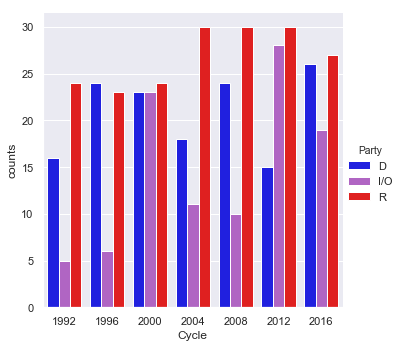

In [423]:
sns.set(style="darkgrid")
colors=['blue','mediumorchid','red']
sns.catplot(x='Cycle',y='counts',hue='Party',palette=colors,kind="bar", \
            data=House_df).set_titles('Number of House Candidates')

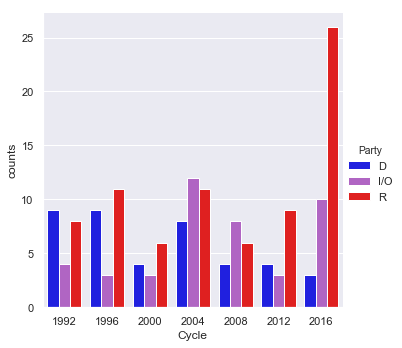

In [424]:
sns.catplot(x='Cycle',y='counts',hue='Party',palette=colors,kind="bar", data=Senate_df)